In [1]:
#data
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv'
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
num_by_sex = {'men': df.Sex.value_counts()['male'], 'women': df.Sex.value_counts()['female']}
sex = num_by_sex.keys()
nums = num_by_sex.values()
survival = {'survived': len(df[(df['Survived']==1)]), 'not_survived': len(df[(df['Survived']==0)])} 
survived_or_not = survival.keys()
survival_num = survival.values()


In [3]:
df.shape

(891, 12)

<BarContainer object of 2 artists>

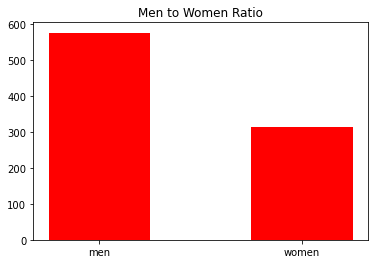

In [37]:
#exploratory
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Men to Women Ratio')
plt.bar(sex, nums, width=0.5, color='r')

<BarContainer object of 2 artists>

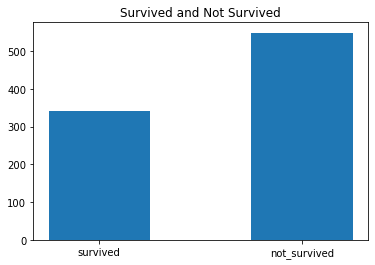

In [38]:
plt.title('Survived and Not Survived')
plt.bar(survived_or_not, survival_num, width=0.5)

In [5]:
# ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
# are not required to train the model 

# df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
inputs = df.drop('Survived',axis=1)
target = df.Survived

In [7]:
inputs.replace({'male': 0, 'female': 1}, inplace=True)
inputs.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [8]:
inputs.isna().any()
# 'Age' col has NaN value

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
# fill NaN by mean value
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [10]:
#check if any NaN still left
inputs.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(712, 179, 712, 179)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [15]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")'

In [ ]:
model.score(X_test, y_test)

In [ ]:
#deployment
model.predict([[1,1,38,71.2833]])
#

In [ ]:
model.predict([[1,1,38,71.2833]])

In [ ]:
model.predict([[3,0,35.0,8.05]])

In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'pos': ['Gu', 'Fo', 'Fo', 'Fo', 'Gu', 'Gu', 'Fo', 'Fo'],
                   'points': [18, 22, 19, 14, 14, 11, 20, 28]})

#count rows where team is 'B' and pos is 'Gu'
len(df[(df['team']=='B') & (df['pos']=='Gu')])